In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [4]:
# 1) Import the dataset
df = pd.read_csv('Telcom_Customer_Churn.csv')

In [5]:
# 2) Explore Dataset
print(df.describe())
print(df.info())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines  

In [6]:
# 3) Fill Missing Values
# 'TotalCharges' needs to be converted to numeric first
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Check for any remaining missing values
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:

# 4) Remove Duplicates
df = df.drop_duplicates()

In [8]:
# 5) Check Inconsistent Data
print(df['gender'].unique())
print(df['PhoneService'].unique())

['Female' 'Male']
['No' 'Yes']


In [9]:
# 6) Standardize Columns to Correct Data Types
# Ensure 'TotalCharges' is numeric, 'Churn' is categorical (binary), and 'SeniorCitizen' is boolean
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert Churn to binary

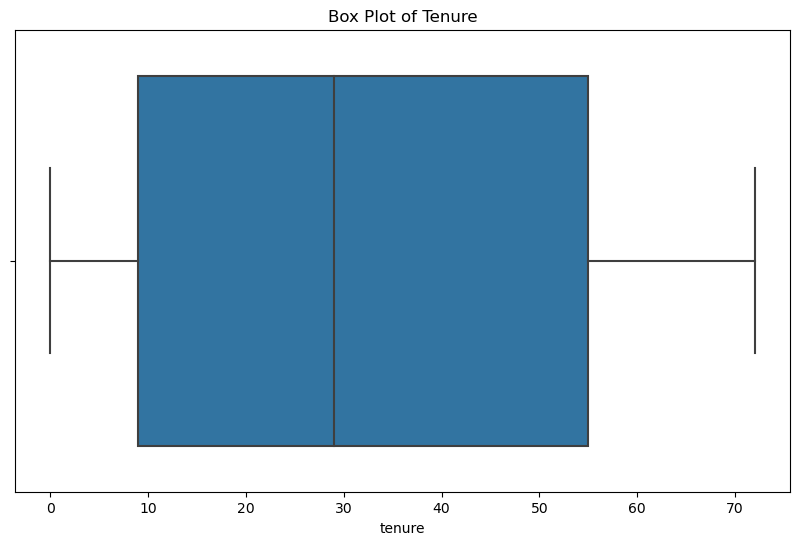

In [10]:
# 7) Identify Outliers
# Create a boxplot to visualize outliers in 'tenure'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Tenure')
plt.show()

# Detecting outliers using Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df[['MonthlyCharges', 'tenure', 'TotalCharges']]))
df = df[(z_scores < 3).all(axis=1)]  # Removing outliers that are more than 3 standard deviations away

In [11]:
# 8) Perform Feature Engineering
# Create new features: 'monthlycharges_per_tenure' and 'has_internet_service'
df['monthlycharges_per_tenure'] = df['MonthlyCharges'] / (df['tenure'] + 1)
df['has_internet_service'] = df['InternetService'].apply(lambda x: 1 if x != 'No' else 0)

In [12]:
# 9) Encoding Categorical Variables
# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                                 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [13]:
# 10) Feature Scaling/Normalization
# Normalize numerical features: 'MonthlyCharges', 'tenure', and 'TotalCharges'
scaler = StandardScaler()
df[['MonthlyCharges', 'tenure', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'tenure', 'TotalCharges']])

In [14]:
# 11) Split the dataset into training and testing sets
X = df.drop(columns=['customerID', 'Churn'])  # Dropping 'customerID' as it's not a feature
y = df['Churn']  # Target variable

In [15]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 12) Export the cleaned dataset for future analysis
df.to_csv('Processed_Telecom_Customer_Churn.csv', index=False)

print("Data cleaning and preparation is complete!")

Data cleaning and preparation is complete!
